#### Load Core Libraries 

In [1]:
import pandas as pd
import numpy as np
import datetime

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
np.random.seed(50)

#### Load Datasets

In [36]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
sample_submission = pd.read_csv('SampleSubmission.csv')
variable_definition = pd.read_csv('VariableDefinitions.csv')

#### Exploratory Data Analysis and Data Preprocessing

In [37]:
#View the Dataset
# Train set
train.head(3)

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,NaN,NaN,Car Classic,0
1,0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,NaN,NaN,Car Classic,1
2,005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,NaN,NaN,Car Classic,0


In [38]:
# Test Set
test.head(3)

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName
0,009D84L,2010-04-24,2011-03-27,NO GENDER,25,2010-04-24,1,NaN,As Attached,Iveco,Victoria Island,Lagos,CVTP
1,01DO2EQ,2010-01-01,2010-12-31,NaN,120,2010-01-01,4,NaN,As Attached,TOYOTA,Victoria Island,Lagos,Muuve
2,01QM0NU,2010-10-23,2011-10-22,Female,46,2010-10-23,1,NaN,NaN,Ford,Abuja Municipal,Abuja-Municipal,Car Classic


In [39]:
# Variable Definition
variable_definition

,ID,Unique ID for the customer
0,Policy Start Date,Date policy started
1,Policy End Date,Date policy ended
2,Gender,Gender of the customer
3,Age,Age of the customer
4,ProductName,Name of Insurance policy
5,First Transaction Date,First date payment was made
6,No_Pol,Number of policies the customer has
7,Car_Category,Type of car
8,Subject_Car_Colour,Car colour
9,Subject_Car_Make,Car make


In [40]:
# Shape of our Datasets
print('Train shape:',train.shape,'\nTest shape:', test.shape, '\nsamplesubmission shape:',sample_submission.shape)

Train shape: (12079, 14) 
Test shape: (5177, 13) 
samplesubmission shape: (5177, 2)


In [41]:
# Information about the trainset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12079 entries, 0 to 12078
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      12079 non-null  object
 1   Policy Start Date       12079 non-null  object
 2   Policy End Date         12079 non-null  object
 3   Gender                  11720 non-null  object
 4   Age                     12079 non-null  int64 
 5   First Transaction Date  12079 non-null  object
 6   No_Pol                  12079 non-null  int64 
 7   Car_Category            8341 non-null   object
 8   Subject_Car_Colour      5117 non-null   object
 9   Subject_Car_Make        9603 non-null   object
 10  LGA_Name                5603 non-null   object
 11  State                   5591 non-null   object
 12  ProductName             12079 non-null  object
 13  target                  12079 non-null  int64 
dtypes: int64(3), object(11)
memory usage: 1.3+ MB


In [42]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5177 entries, 0 to 5176
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      5177 non-null   object
 1   Policy Start Date       5177 non-null   object
 2   Policy End Date         5177 non-null   object
 3   Gender                  5021 non-null   object
 4   Age                     5177 non-null   int64 
 5   First Transaction Date  5177 non-null   object
 6   No_Pol                  5177 non-null   int64 
 7   Car_Category            3539 non-null   object
 8   Subject_Car_Colour      2172 non-null   object
 9   Subject_Car_Make        4116 non-null   object
 10  LGA_Name                2395 non-null   object
 11  State                   2389 non-null   object
 12  ProductName             5177 non-null   object
dtypes: int64(2), object(11)
memory usage: 525.9+ KB


In [43]:
## Checking for Missing Values 
## Percentage of Missing in the train data
(train.isnull().sum()/ train.shape[0]) * 100

ID                         0.000000
Policy Start Date          0.000000
Policy End Date            0.000000
Gender                     2.972100
Age                        0.000000
First Transaction Date     0.000000
No_Pol                     0.000000
Car_Category              30.946270
Subject_Car_Colour        57.637222
Subject_Car_Make          20.498386
LGA_Name                  53.613710
State                     53.713056
ProductName                0.000000
target                     0.000000
dtype: float64

In [44]:
## Checking for Missing Values 
## Percentage of Missing in the test data
(test.isnull().sum()/ test.shape[0]) * 100

ID                         0.000000
Policy Start Date          0.000000
Policy End Date            0.000000
Gender                     3.013328
Age                        0.000000
First Transaction Date     0.000000
No_Pol                     0.000000
Car_Category              31.639946
Subject_Car_Colour        58.045200
Subject_Car_Make          20.494495
LGA_Name                  53.737686
State                     53.853583
ProductName                0.000000
dtype: float64

In [45]:
##join train and test together

ntrain = train.shape[0]
ntest = test.shape[0]

all_data = pd.concat((train, test)).reset_index(drop=True)
print("all_data size is : {}".format(all_data.shape))

## Missing Values 
all_data.isnull().sum()/all_data.shape[0]

all_data size is : (17256, 14)


ID                        0.000000
Policy Start Date         0.000000
Policy End Date           0.000000
Gender                    0.029845
Age                       0.000000
First Transaction Date    0.000000
No_Pol                    0.000000
Car_Category              0.311544
Subject_Car_Colour        0.577596
Subject_Car_Make          0.204972
LGA_Name                  0.536509
State                     0.537552
ProductName               0.000000
target                    0.300012
dtype: float64

###  Data Preprocessing

In [46]:
# Drop features with Over 20% Missing values
new_data = pd.DataFrame()

for var in all_data.columns:
    if all_data[var].isnull().sum()/ all_data.shape[0] * 100  < 20:
        new_data[var]=all_data[var]

new_data.head(3)

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,ProductName
0,0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Car Classic
1,0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,Car Classic
2,005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Car Classic


In [47]:
## Different Tpyes of features 

# Date Features
date_col = ['Policy Start Date','Policy End Date','First Transaction Date']

# Numeric Features 
num_col = ['Age']

# Categorical Faetures 
cat_col = [col for col in new_data.columns if col not in date_col+num_col]

# Drop ID
cat_col.remove('ID')
cat_col

['Gender', 'No_Pol', 'ProductName']

In [48]:
## Checking for Missing Values 
## Percentage of Missing in the dtrain data
(new_data.isnull().sum()/ new_data.shape[0])

ID                        0.000000
Policy Start Date         0.000000
Policy End Date           0.000000
Gender                    0.029845
Age                       0.000000
First Transaction Date    0.000000
No_Pol                    0.000000
ProductName               0.000000
dtype: float64

In [49]:
## Numeric features
new_data.describe()

,Age,No_Pol
count,17256.000000,17256.000000
mean,42.677272,1.307545
std,82.489880,0.726804
min,-6099.000000,1.000000
25%,34.000000,1.000000
50%,40.000000,1.000000
75%,50.000000,1.000000
max,320.000000,10.000000


In [50]:
#### Abnormal Age
print(new_data.Age[new_data['Age']< 0])
print(new_data.Age[new_data['Age']> 144])

# Replacing it with Zer0
new_data.Age[new_data['Age']< 0] = new_data.Age[new_data['Age']< 0]  - new_data.Age[new_data['Age']< 0]
new_data.Age[new_data['Age']> 144] = new_data.Age[new_data['Age']> 144] -new_data.Age[new_data['Age']> 144] 


909       -76
1226       -2
2580      -12
3114       -2
3427    -6099
3518    -5939
3649      -22
5173    -5939
6387      -12
6856      -76
7639      -27
9206      -51
10713     -76
11085     -26
11277      -2
12364     -12
12927     -12
13320     -76
13808     -26
15504     -27
16626     -51
Name: Age, dtype: int64
2487     320
3493     320
4511     320
4969     320
4975     320
5730     320
5885     320
6137     320
6185     320
8123     320
10090    320
10819    320
12459    320
13148    320
13932    320
15175    320
15287    320
15728    320
16350    320
Name: Age, dtype: int64


<ipython-input-50-803b9a408a00>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data.Age[new_data['Age']< 0] = new_data.Age[new_data['Age']< 0]  - new_data.Age[new_data['Age']< 0]


In [51]:
new_data.Age.describe()

count    17256.000000
mean        43.400788
std         19.586153
min          0.000000
25%         34.000000
50%         40.000000
75%         50.000000
max        144.000000
Name: Age, dtype: float64

In [52]:
## For Each  categorical variables in The Reduced Dataset , Find the Frequncy counts
for var in cat_col:
    print(var, new_data[var].unique())
    print(" -------------------------------------------------------------- ")
    print(" -------------------------------------------------------------- ")

Gender ['Male' 'Female' 'Entity' 'Joint Gender' nan 'NO GENDER' 'NOT STATED'
 'SEX']
 -------------------------------------------------------------- 
 -------------------------------------------------------------- 
No_Pol [ 1  3  2  4  5  7 10  6]
 -------------------------------------------------------------- 
 -------------------------------------------------------------- 
ProductName ['Car Classic' 'CarSafe' 'Muuve' 'CVTP' 'Car Plus' 'Motor Cycle'
 'Customized Motor' 'CarFlex' 'Car Vintage']
 -------------------------------------------------------------- 
 -------------------------------------------------------------- 


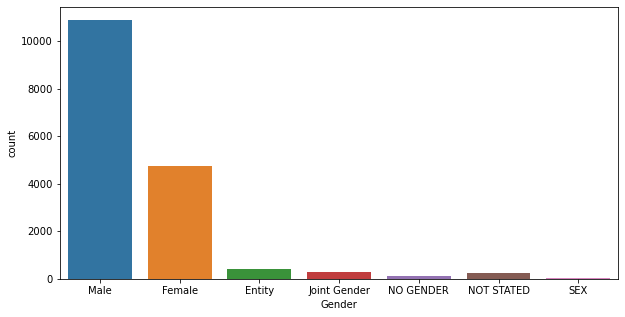

In [53]:
## Gender
plt.figure(figsize=(10,5))
sns.countplot(new_data.Gender)

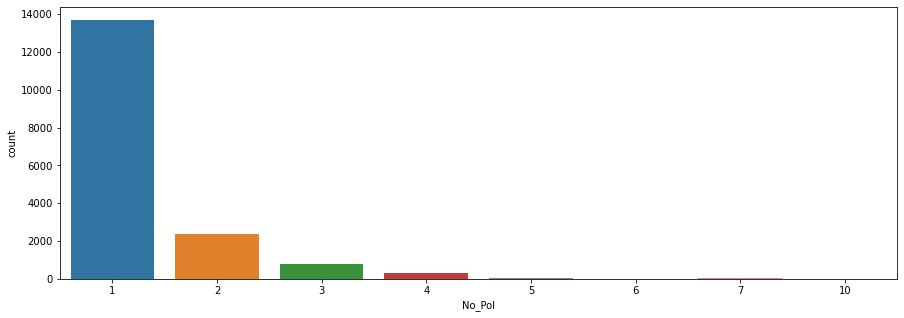

In [54]:
## Number of Policies 
plt.figure(figsize=(15,5))
sns.countplot(new_data.No_Pol)

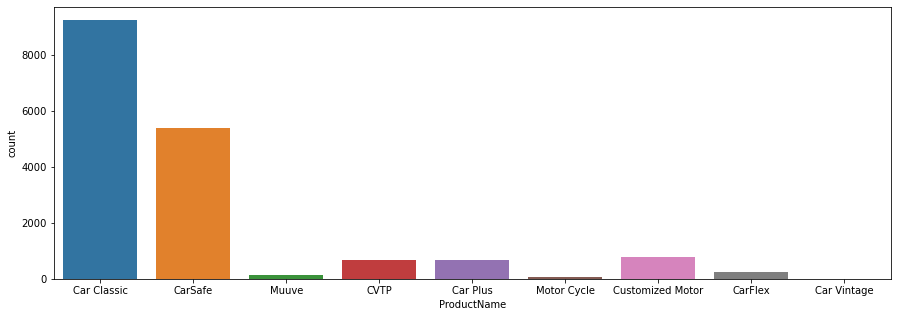

In [55]:
## Product Name
plt.figure(figsize=(15,5))
sns.countplot(new_data.ProductName)

In [56]:
## Replacining the Missing Values in Genders with Others
new_data['Gender'].fillna(value="Others", inplace= True)
new_data['Gender'].isnull().sum()

0

In [57]:
new_data['Gender'].unique()

array(['Male', 'Female', 'Entity', 'Joint Gender', 'Others', 'NO GENDER',
       'NOT STATED', 'SEX'], dtype=object)

In [60]:
## Map
mapper = {"Male":"M","Female":'F','Entity':'O','Joint Gender':'O','Others':'O','NO GENDER':'O','NOT STATED':'O','SEX':'O' }
new_data.Gender = new_data.Gender.map(mapper)
new_data.Gender.unique()

array(['M', 'F', 'O'], dtype=object)

In [61]:
new_data.isnull().sum()

ID                        0
Policy Start Date         0
Policy End Date           0
Gender                    0
Age                       0
First Transaction Date    0
No_Pol                    0
ProductName               0
dtype: int64

In [62]:
## Date Features
print(date_col)
## Converting to Date 
for var in date_col:
    new_data[var] = pd.to_datetime(new_data[var])

    

['Policy Start Date', 'Policy End Date', 'First Transaction Date']


In [63]:
# Informnation About the dataset
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17256 entries, 0 to 17255
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID                      17256 non-null  object        
 1   Policy Start Date       17256 non-null  datetime64[ns]
 2   Policy End Date         17256 non-null  datetime64[ns]
 3   Gender                  17256 non-null  object        
 4   Age                     17256 non-null  int64         
 5   First Transaction Date  17256 non-null  datetime64[ns]
 6   No_Pol                  17256 non-null  int64         
 7   ProductName             17256 non-null  object        
dtypes: datetime64[ns](3), int64(2), object(3)
memory usage: 1.1+ MB


In [64]:
##Function that Numbers from the Date and Add it to the Dataframe
def extract_date_info(df,cols,):
    for var in cols:
        df[var +'_year'] = df[var].dt.year
        df[var +'_day'] = df[var].dt.day
        df[var +'_month'] = df[var].dt.month
        df[var +'_quarter'] = df[var].dt.quarter
    df.drop(columns=date_col,axis=1,inplace=True)

In [65]:
###
extract_date_info(new_data,date_col)
### Drop the ID Columns
new_data.drop(columns=['ID'],inplace=True)
new_data.head(3)

,Gender,Age,No_Pol,ProductName,Policy Start Date_year,Policy Start Date_day,Policy Start Date_month,Policy Start Date_quarter,Policy End Date_year,Policy End Date_day,Policy End Date_month,Policy End Date_quarter,First Transaction Date_year,First Transaction Date_day,First Transaction Date_month,First Transaction Date_quarter
0,M,30,1,Car Classic,2010,14,5,2,2011,13,5,2,2010,14,5,2
1,F,79,1,Car Classic,2010,29,11,4,2011,28,11,4,2010,29,11,4
2,M,43,1,Car Classic,2010,21,3,1,2011,20,3,1,2010,21,3,1


In [66]:
# Encoding Categorical Variables 
new_data1 = pd.get_dummies(new_data,prefix=[0,3])
new_data1.head(3)

,Age,No_Pol,Policy Start Date_year,Policy Start Date_day,Policy Start Date_month,Policy Start Date_quarter,Policy End Date_year,Policy End Date_day,Policy End Date_month,Policy End Date_quarter,...,0_O,3_CVTP,3_Car Classic,3_Car Plus,3_Car Vintage,3_CarFlex,3_CarSafe,3_Customized Motor,3_Motor Cycle,3_Muuve
0,30,1,2010,14,5,2,2011,13,5,2,...,0,0,1,0,0,0,0,0,0,0
1,79,1,2010,29,11,4,2011,28,11,4,...,0,0,1,0,0,0,0,0,0,0
2,43,1,2010,21,3,1,2011,20,3,1,...,0,0,1,0,0,0,0,0,0,0


In [68]:
new_data1.columns
new_data1.drop(["0_O","3_CVTP"],axis=1,inplace=True)

In [71]:
###Get the new dataset
new_train= new_data1[:ntrain]
new_test = new_data1[ntrain:]

# 
new_train['Target']=train.target

<ipython-input-71-af2c1e2da6b6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_train['Target']=train.target


In [72]:
print(new_train.info())
new_train.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12079 entries, 0 to 12078
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Age                             12079 non-null  int64
 1   No_Pol                          12079 non-null  int64
 2   Policy Start Date_year          12079 non-null  int64
 3   Policy Start Date_day           12079 non-null  int64
 4   Policy Start Date_month         12079 non-null  int64
 5   Policy Start Date_quarter       12079 non-null  int64
 6   Policy End Date_year            12079 non-null  int64
 7   Policy End Date_day             12079 non-null  int64
 8   Policy End Date_month           12079 non-null  int64
 9   Policy End Date_quarter         12079 non-null  int64
 10  First Transaction Date_year     12079 non-null  int64
 11  First Transaction Date_day      12079 non-null  int64
 12  First Transaction Date_month    12079 non-null  int64
 13  F

,Age,No_Pol,Policy Start Date_year,Policy Start Date_day,Policy Start Date_month,Policy Start Date_quarter,Policy End Date_year,Policy End Date_day,Policy End Date_month,Policy End Date_quarter,...,0_M,3_Car Classic,3_Car Plus,3_Car Vintage,3_CarFlex,3_CarSafe,3_Customized Motor,3_Motor Cycle,3_Muuve,Target
0,30,1,2010,14,5,2,2011,13,5,2,...,1,1,0,0,0,0,0,0,0,0
1,79,1,2010,29,11,4,2011,28,11,4,...,0,1,0,0,0,0,0,0,0,1
2,43,1,2010,21,3,1,2011,20,3,1,...,1,1,0,0,0,0,0,0,0,0


In [73]:
X = new_train.iloc[:,0:24].values
y = new_train.iloc[:,24].values
X.shape, y.shape

((12079, 24), (12079,))

### Training and Validating The Model Using  the new_train dataset

In [74]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.7,random_state=0)

In [75]:
## Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [78]:
### Trainng and Evaluating Differnt Models
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']

In [85]:
# Ramdom forest
#initialize
rfc =RandomForestClassifier(random_state=0)
#fit 
rfc.fit(X_train_scaled,y_train)

# predict
y_val_pred = rfc.predict(X_val_scaled)

# Evaluation

print('*************** Classification report on training set ********************')
print(classification_report(y_val,y_val_pred , target_names=target_names,digits=4))
print(f1_score(y_val,y_val_pred))


*************** Classification report on training set ********************
              precision    recall  f1-score   support

     class 0     0.8927    0.9629    0.9265      7416
     class 1     0.3982    0.1750    0.2432      1040

    accuracy                         0.8660      8456
   macro avg     0.6455    0.5690    0.5848      8456
weighted avg     0.8319    0.8660    0.8425      8456

0.24315297261189042


In [84]:
# Extra Trees 
#initialize
etc =ExtraTreesClassifier(random_state=0)
#fit 
etc.fit(X_train_scaled,y_train)

# predict
y_val_pred = etc.predict(X_val_scaled)

# Evaluation

print('*************** Classification report on training set ********************')
print(classification_report(y_val,y_val_pred , target_names=target_names,digits=4))
print(f1_score(y_val,y_val_pred))



*************** Classification report on training set ********************
              precision    recall  f1-score   support

     class 0     0.8919    0.9461    0.9182      7416
     class 1     0.3220    0.1827    0.2331      1040

    accuracy                         0.8522      8456
   macro avg     0.6070    0.5644    0.5757      8456
weighted avg     0.8218    0.8522    0.8339      8456

0.2331288343558282


In [86]:
# Decision tress Classifier
#initialize
dtc =DecisionTreeClassifier(random_state=0)
#fit 
dtc.fit(X_train_scaled,y_train)

# predict
y_val_pred = dtc.predict(X_val_scaled)

# Evaluation

print('*************** Classification report on training set ********************')
print(classification_report(y_val,y_val_pred , target_names=target_names))
print(f1_score(y_val,y_val_pred))


*************** Classification report on training set ********************
              precision    recall  f1-score   support

     class 0       0.90      0.90      0.90      7416
     class 1       0.27      0.26      0.27      1040

    accuracy                           0.82      8456
   macro avg       0.59      0.58      0.58      8456
weighted avg       0.82      0.82      0.82      8456

0.2659416707859615


### Training On the whole train

In [87]:
## Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_test = scaler.fit_transform(new_test)

In [88]:
# Ramdom forest
#initialize
rfc =RandomForestClassifier()
#fit 
rfc.fit(X_scaled,y)

RandomForestClassifier()

In [89]:
# predict
prediction = rfc.predict(X_test)

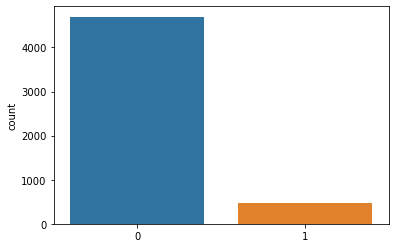

In [90]:
sns.countplot(prediction)

In [94]:
submission_file = sample_submission.copy()
submission_file.target = prediction
submission_file.to_csv('prediction.csv',index=False)

In [95]:
submission_file.head(4)

,ID,target
0,009D84L,1
1,01DO2EQ,1
2,01QM0NU,0
3,024NJLZ,1


In [96]:
### Saving The Model using the Pickle Libaray and Joblib Libaray

In [98]:
import pickle

with open('randomforest_UmojaHack_Model','wb') as f:
    pickle.dump(rfc,f)